In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.optimizers import RMSprop, Adam

In [5]:
!cp /content/drive/MyDrive/archive.zip /content

In [6]:
!ls -lah /content/archive.zip

-rw------- 1 root root 2.7G Nov 17 06:03 /content/archive.zip


In [7]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [16]:
image_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

In [17]:
train_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
test_path="/content/test/"

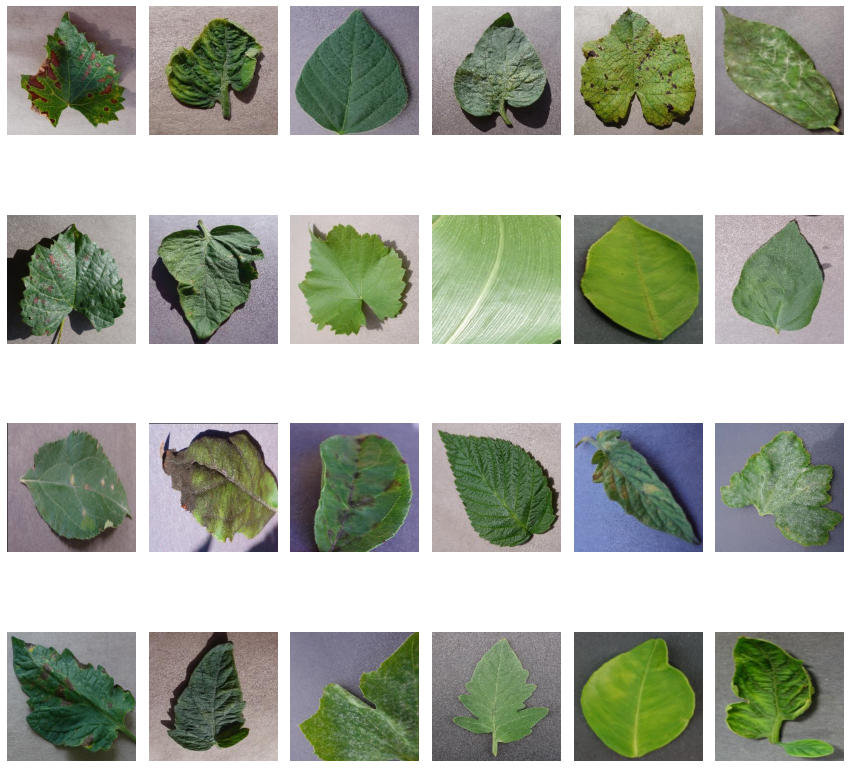

In [18]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [19]:
class_names = os.listdir(image_path)
print(class_names)

['Grape___Esca_(Black_Measles)', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Bacterial_spot', 'Apple___Apple_scab', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Squash___Powdery_mildew', 'Soybean___healthy', 'Grape___healthy', 'Pepper,_bell___healthy', 'Peach___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 'Blueberry___healthy', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___healthy', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Black_rot', 'Strawberry___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___Early_blight', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Common_rust_', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Apple___healthy', 'Grape___Black_rot', 'Strawberry_

In [20]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 38


In [21]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class


Number of images
Grape___Esca_(Black_Measles)                                    1920
Orange___Haunglongbing_(Citrus_greening)                        2010
Tomato___Bacterial_spot                                         1702
Apple___Apple_scab                                              2016
Tomato___Late_blight                                            1851
Tomato___Target_Spot                                            1827
Cherry_(including_sour)___Powdery_mildew                        1683
Potato___Late_blight                                            1939
Tomato___Tomato_mosaic_virus                                    1790
Squash___Powdery_mildew                                         1736
Soybean___healthy                                               2022
Grape___healthy                                                 1692
Pepper,_bell___healthy                                          1988
Peach___Bacterial_spot                                          1838
Tomato___Septoria_leaf_spot                                     1745
Tomato___Early_blight                                           1920
Blueberry___healthy                                             1816
Raspberry___healthy                                             1781
Tomato___Leaf_Mold                                              1882
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot              1642
Corn_(maize)___healthy                                          1859
Potato___healthy                                                1824
Corn_(maize)___Northern_Leaf_Blight                             1908
Tomato___Spider_mites Two-spotted_spider_mite                   1741
Apple___Black_rot                                               1987
Strawberry___healthy                                            1824
Tomato___healthy                                                1926
Tomato___Tomato_Yellow_Leaf_Curl_Virus                          1961
Potato___Early_blight                                           1939
Apple___Cedar_apple_rust                                        1760
Corn_(maize)___Common_rust_                                     1907
Peach___healthy                                                 1728
Pepper,_bell___Bacterial_spot                                   1913
Apple___healthy                                                 2008
Grape___Black_rot                                               1888
Strawberry___Leaf_scorch                                        1774
Cherry_(including_sour)___healthy                               1826
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                      1722

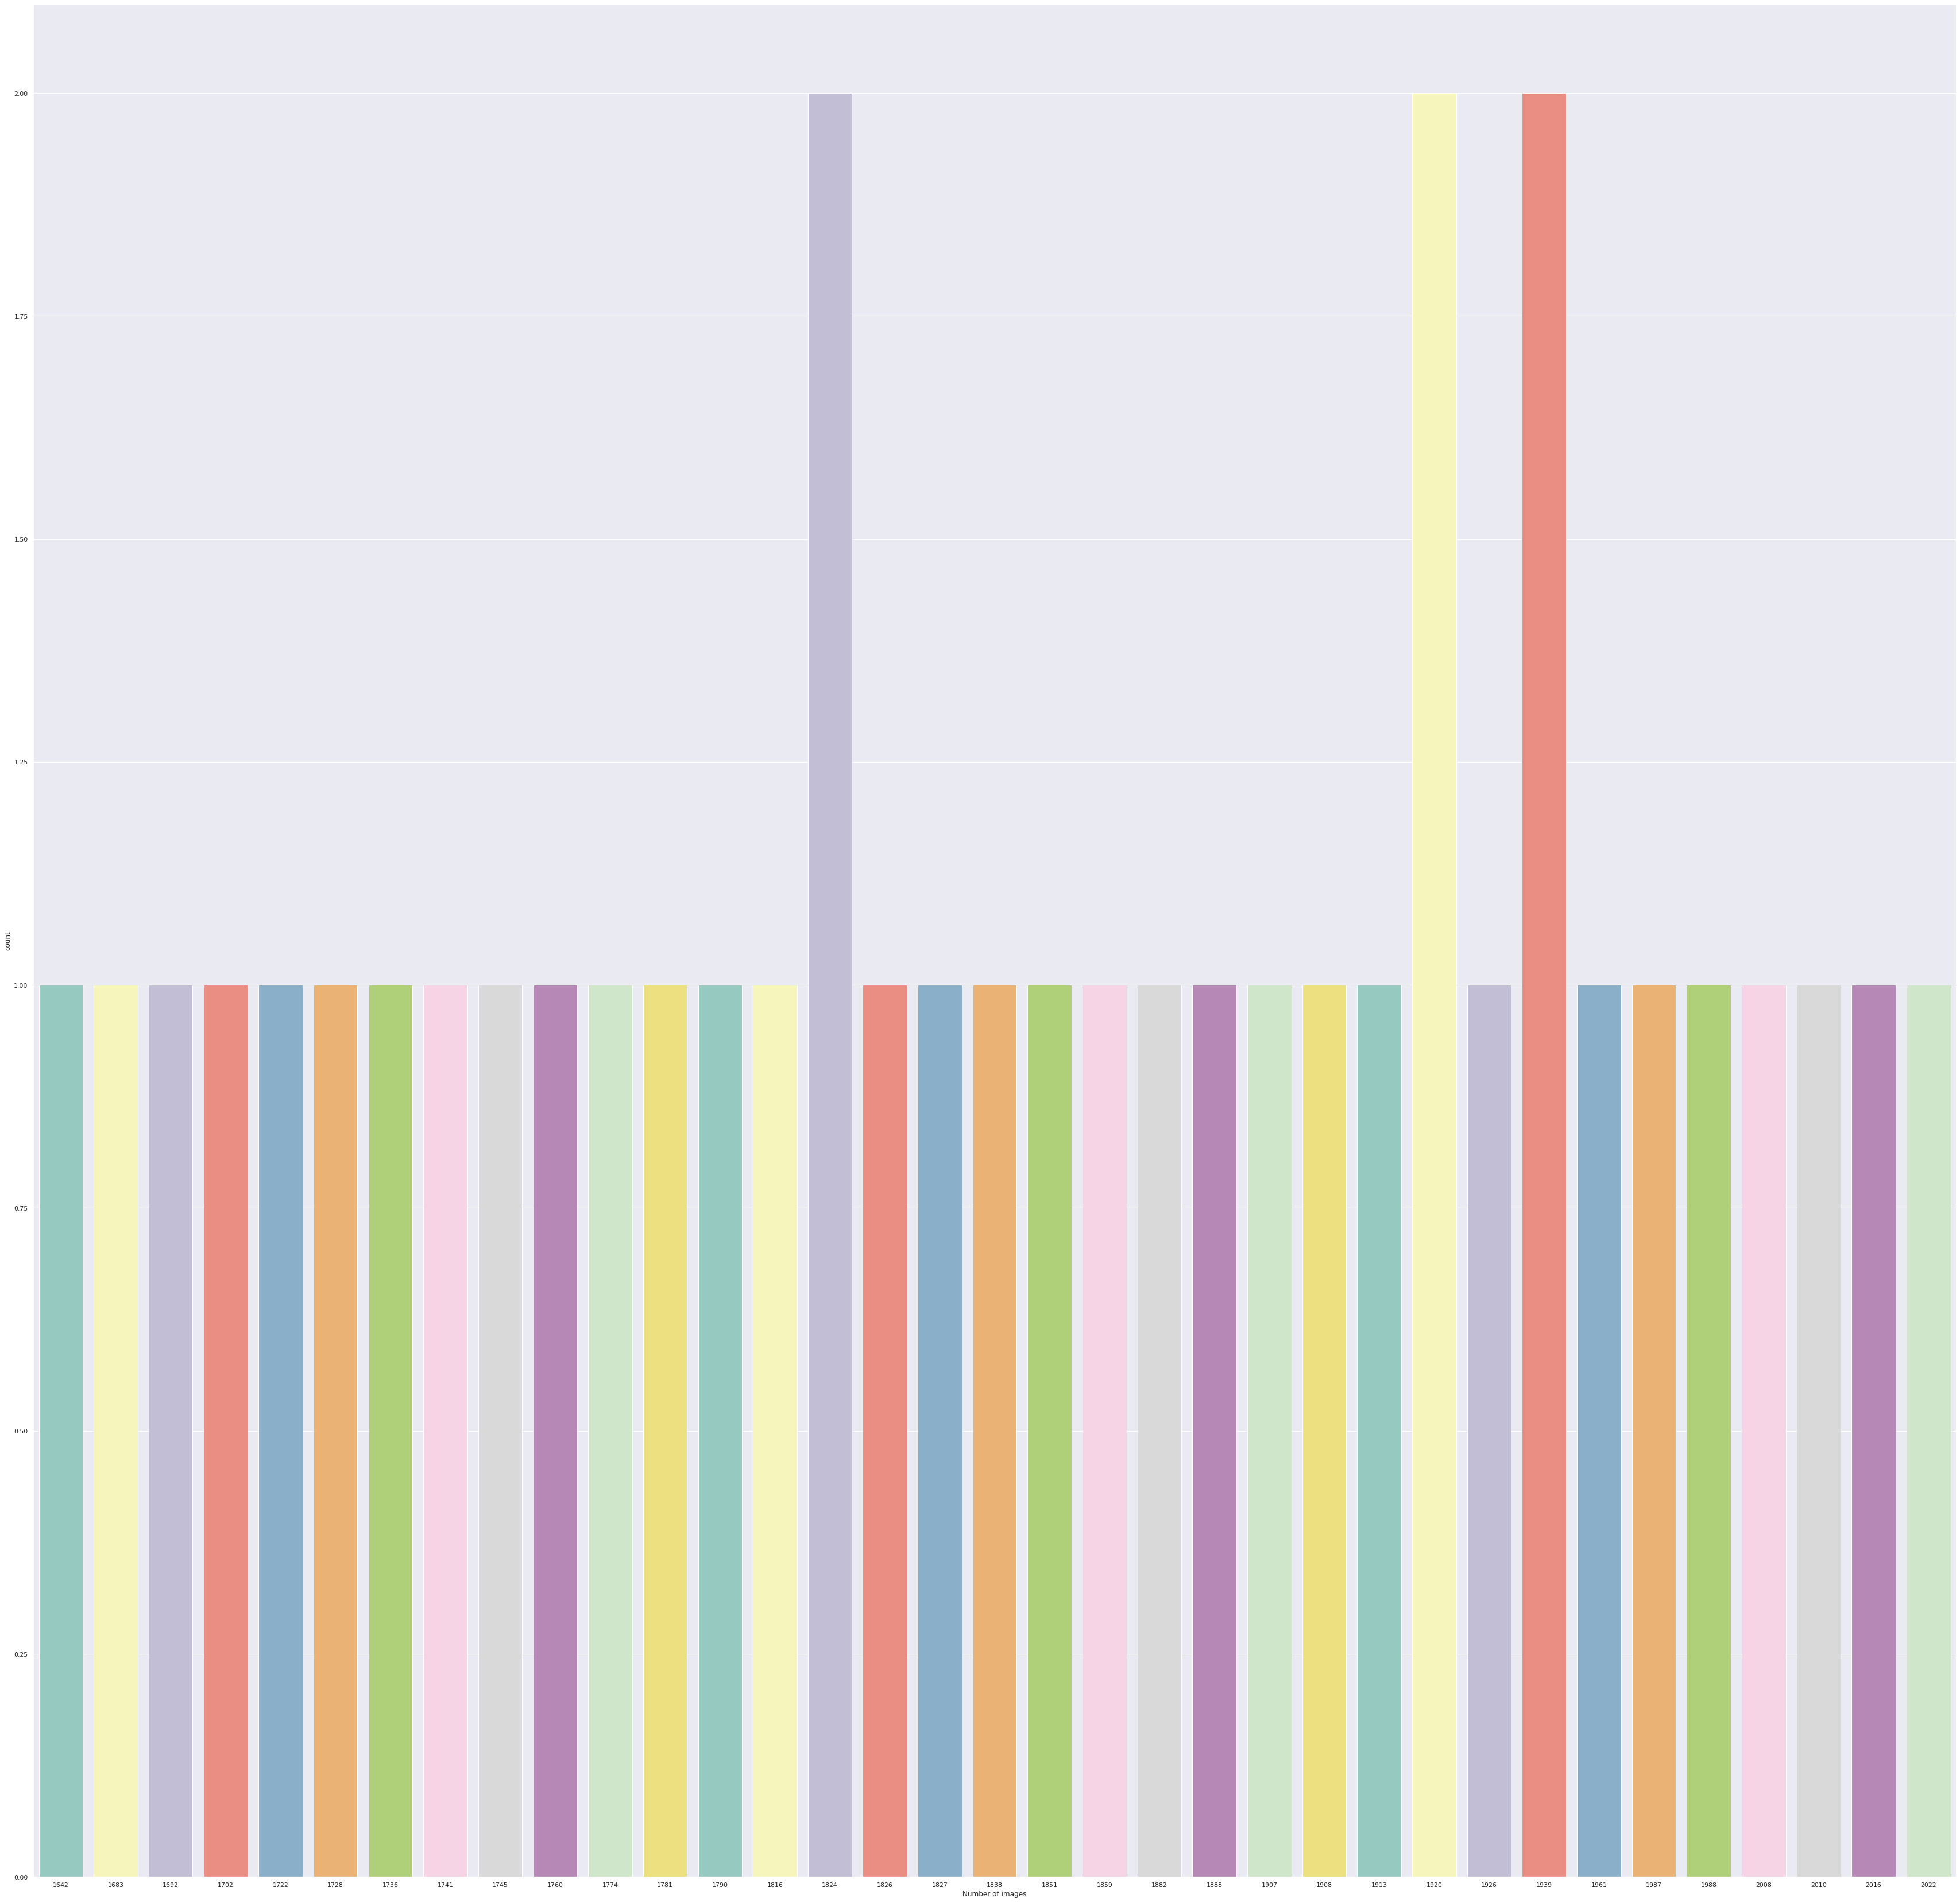

In [22]:
sns.set(rc={'figure.figsize':(60,60)})
ax = sns.countplot(x="Number of images", data=images_each_class,palette="Set3")

In [23]:
batch_size=20

In [24]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True,validation_split=0.2,fill_mode='nearest')

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [25]:
train_data_generator=traindata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True )

Found 70295 images belonging to 38 classes.


In [26]:
valid_data_generator=validdata_generator.flow_from_directory(train_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=True)

Found 70295 images belonging to 38 classes.


In [27]:
test_data_generator=testdata_generator.flow_from_directory(valid_path,batch_size=batch_size,class_mode="categorical",
                                                           target_size=(224,224),color_mode="rgb",shuffle=False )

Found 17572 images belonging to 38 classes.


In [28]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [21]:
train_number=train_data_generator.samples
valid_number=valid_data_generator.samples

In [22]:
mobilenetV2_model= tf.keras.applications.MobileNetV2(weights='imagenet',classes=38,include_top=False, input_shape=(224,224, 3))
x= mobilenetV2_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
prediction= Dense(38, activation = 'softmax')(x)
model= Model(inputs= mobilenetV2_model.input, outputs= prediction)

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

In [23]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [25]:
history= model.fit(train_data_generator, 
                   steps_per_epoch=train_number//batch_size, 
                   validation_data= valid_data_generator, 
                   validation_steps= valid_number//batch_size,
                   shuffle=True, 
                   
                   epochs =10, 
                   batch_size = 20,callbacks=[callback])

Epoch 1/10
3514/3514 [==============================] - 1160s 326ms/step - loss: 0.4400 - accuracy: 0.8665 - val_loss: 5.0465 - val_accuracy: 0.3712
Epoch 2/10
3514/3514 [==============================] - 1104s 314ms/step - loss: 0.2262 - accuracy: 0.9295 - val_loss: 1.9179 - val_accuracy: 0.6276
Epoch 3/10
3514/3514 [==============================] - 1063s 302ms/step - loss: 0.1645 - accuracy: 0.9480 - val_loss: 0.5371 - val_accuracy: 0.8683
Epoch 4/10
3514/3514 [==============================] - 1103s 314ms/step - loss: 0.1339 - accuracy: 0.9572 - val_loss: 0.6149 - val_accuracy: 0.8677
Epoch 5/10
3514/3514 [==============================] - 1114s 317ms/step - loss: 0.1138 - accuracy: 0.9635 - val_loss: 0.5243 - val_accuracy: 0.8736
Epoch 6/10
3514/3514 [==============================] - 1133s 322ms/step - loss: 0.1007 - accuracy: 0.9679 - val_loss: 0.4099 - val_accuracy: 0.8903
Epoch 7/10
3514/3514 [==============================] - 1099s 313ms/step - loss: 0.0865 - accuracy: 0.9724

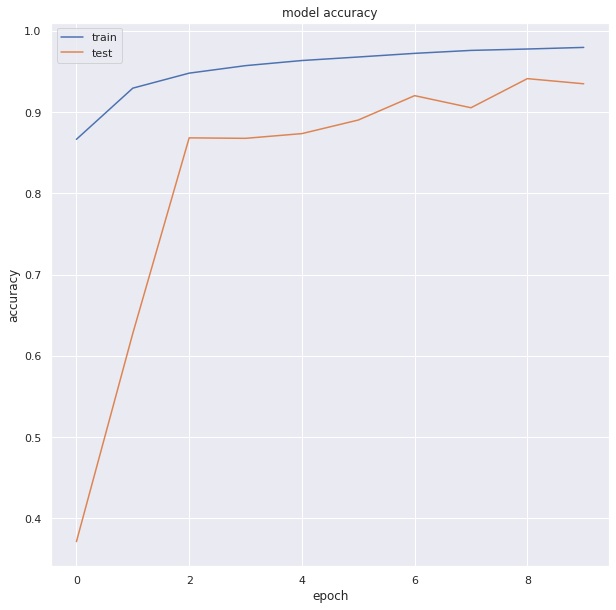

In [26]:
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

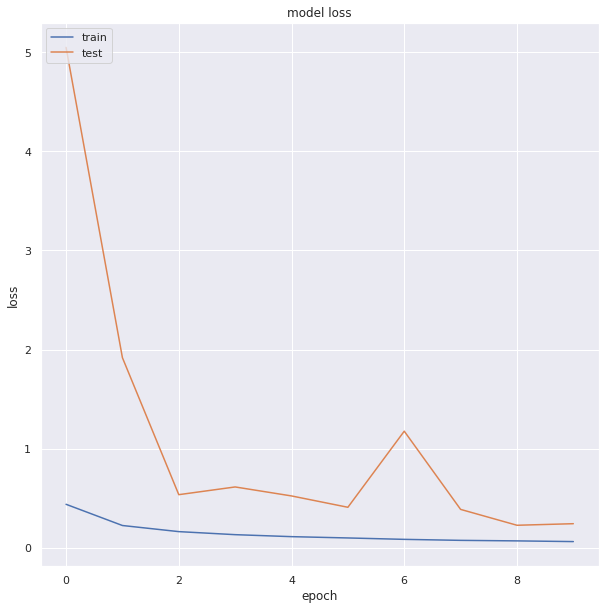

In [27]:
# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
predictions=model.predict(test_data_generator)

879/879 [==============================] - 45s 51ms/step


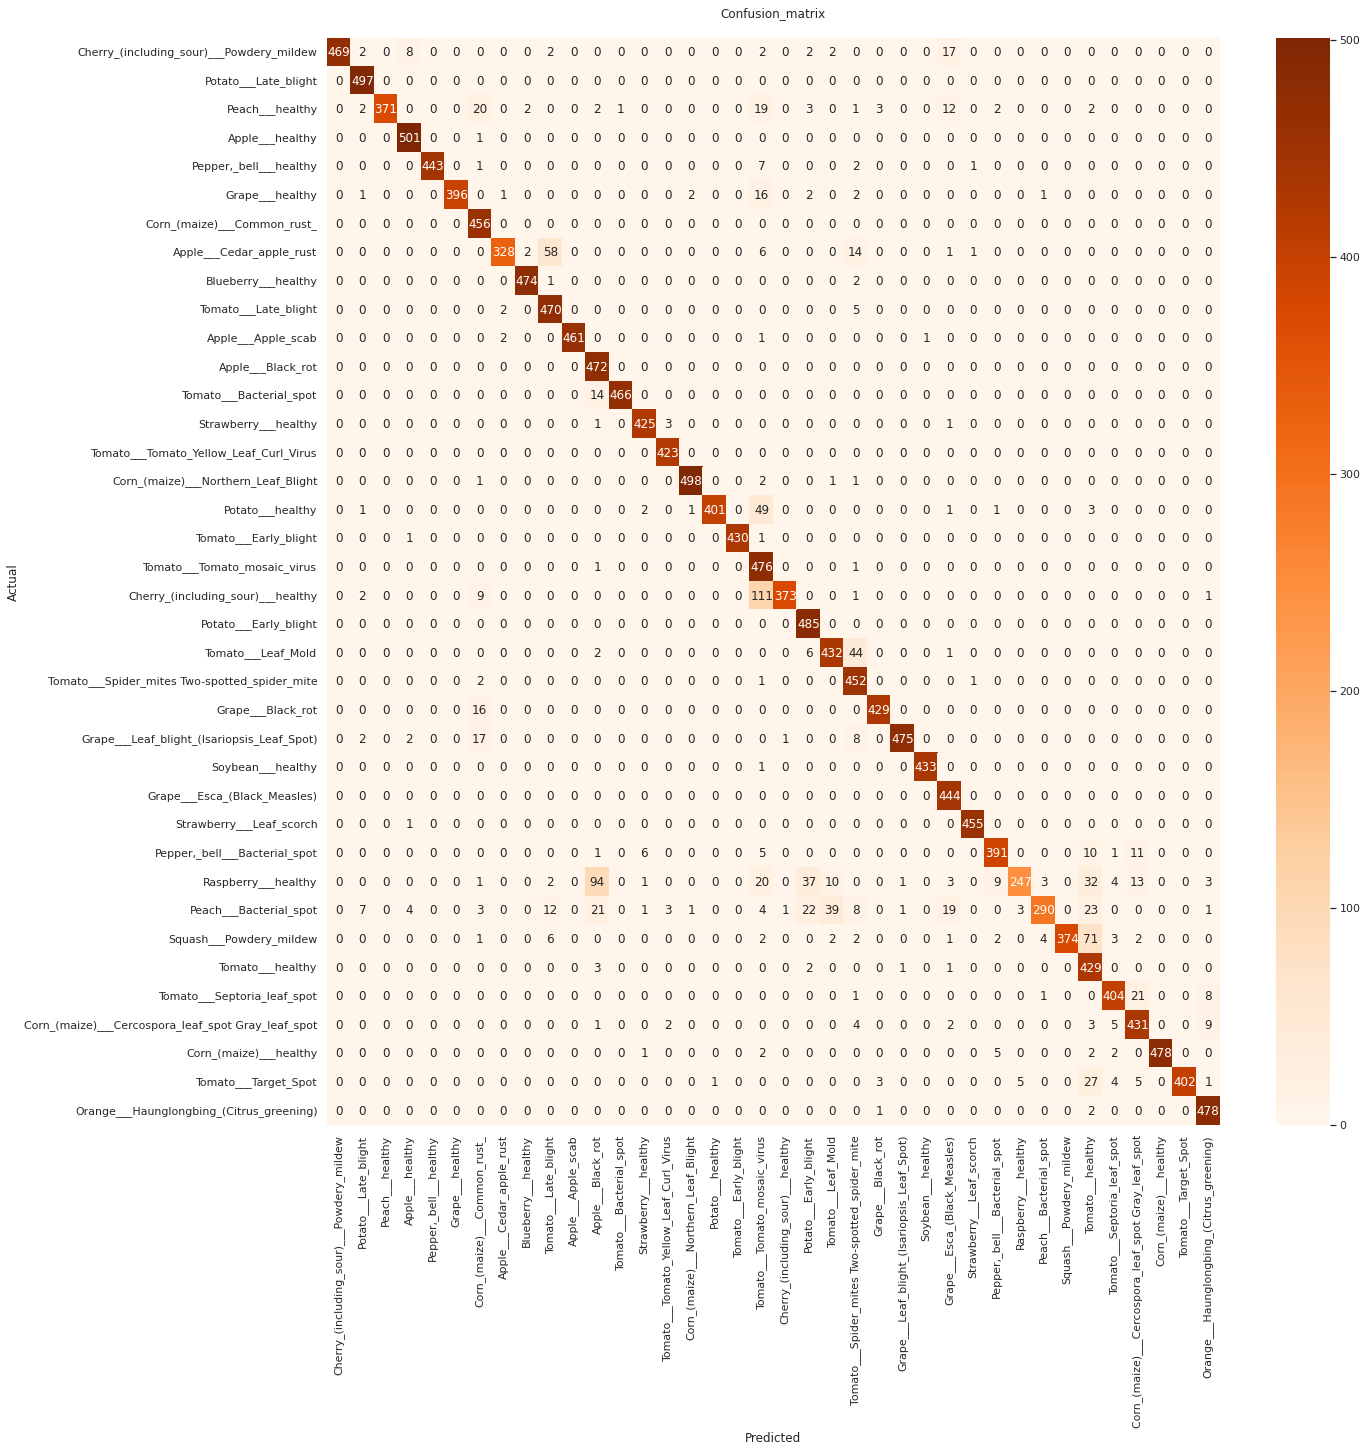

In [29]:
plt.figure(figsize=(20,20))
cm= confusion_matrix(test_data_generator.classes,predictions.argmax(axis=1))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="Oranges",xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion_matrix\n")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [31]:
# save the model to disk
print("[INFO] Saving model...")
filepath="/content/plant_disease_identification_model.h5"
model.save(filepath)

[INFO] Saving model...


In [32]:
# save the history to disk
import pickle
print("[INFO] Saving history...")
pickle.dump(model,open('/content/plant_disease_identification_history.pkl', 'wb'))

[INFO] Saving history...


In [29]:
from keras.models import load_model
model_saved = load_model('/content/plant_disease_identification_model.h5')

In [33]:
def generate_url(predicted_class_name):
  predicted_class_name = predicted_class_name.split('___')[1].split('_')
  final_predicted_class_name = '%20'.join([str(elem) for elem in predicted_class_name])
  url = "https://www.plantwise.org/knowledgebank/searchresults?q=" + final_predicted_class_name
  return url

1/1 [==============================] - 0s 22ms/step
Actual class name - AppleCedarRust1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Cedar%20apple%20rust


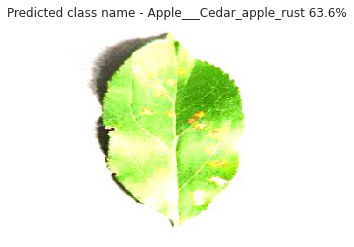

1/1 [==============================] - 0s 26ms/step
Actual class name - AppleCedarRust2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Cedar%20apple%20rust


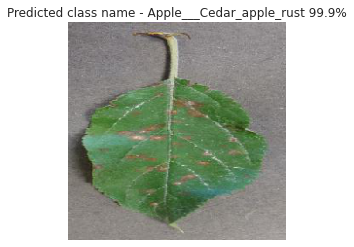

1/1 [==============================] - 0s 23ms/step
Actual class name - AppleCedarRust3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Cedar%20apple%20rust


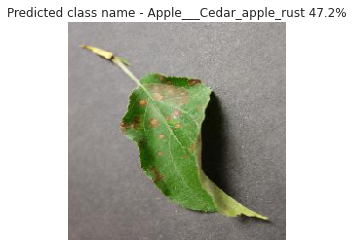

1/1 [==============================] - 0s 26ms/step
Actual class name - AppleCedarRust4
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Cedar%20apple%20rust


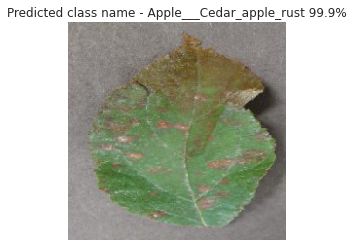

1/1 [==============================] - 0s 24ms/step
Actual class name - AppleScab1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Leaf%20scorch


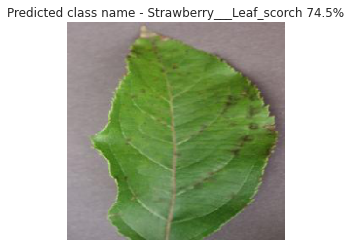

1/1 [==============================] - 0s 21ms/step
Actual class name - AppleScab2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Apple%20scab


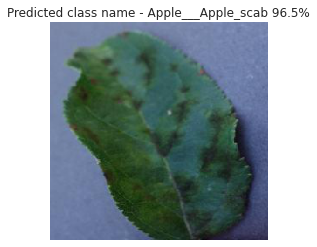

1/1 [==============================] - 0s 22ms/step
Actual class name - AppleScab3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


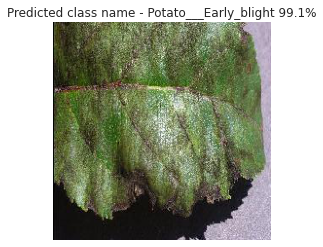

1/1 [==============================] - 0s 21ms/step
Actual class name - CornCommonRust1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Common%20rust%20


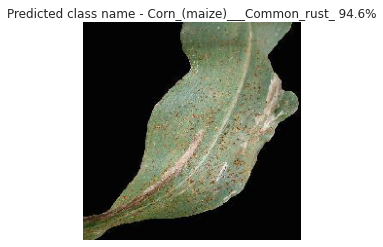

1/1 [==============================] - 0s 22ms/step
Actual class name - CornCommonRust2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Common%20rust%20


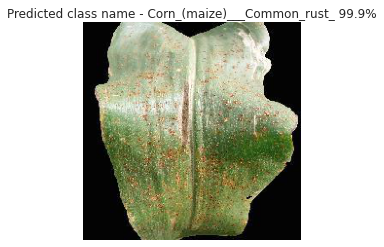

1/1 [==============================] - 0s 25ms/step
Actual class name - CornCommonRust3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Common%20rust%20


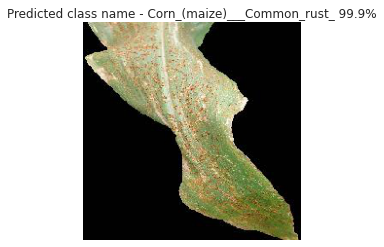

1/1 [==============================] - 0s 24ms/step
Actual class name - PotatoEarlyBlight1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


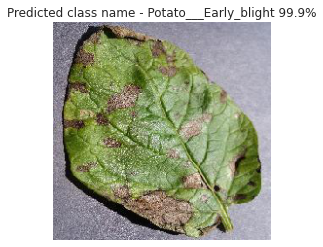

1/1 [==============================] - 0s 21ms/step
Actual class name - PotatoEarlyBlight2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


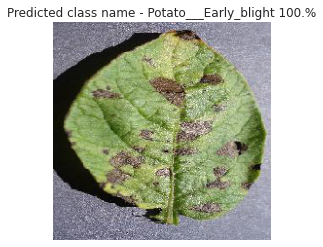

1/1 [==============================] - 0s 25ms/step
Actual class name - PotatoEarlyBlight3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


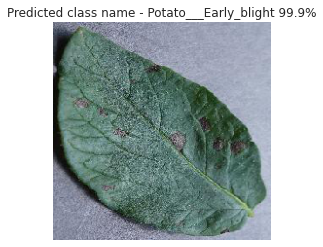

1/1 [==============================] - 0s 21ms/step
Actual class name - PotatoEarlyBlight4
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


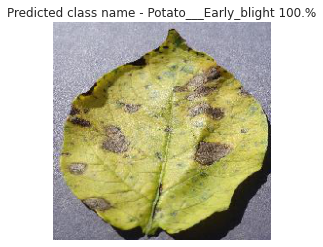

1/1 [==============================] - 0s 44ms/step
Actual class name - PotatoEarlyBlight5
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


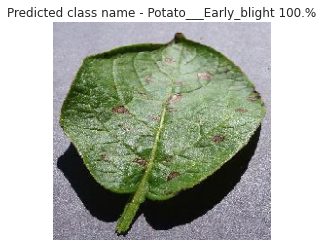

1/1 [==============================] - 0s 25ms/step
Actual class name - PotatoHealthy1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=healthy


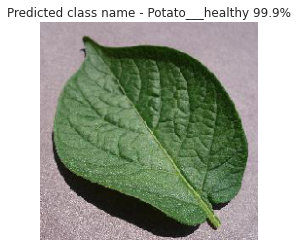

1/1 [==============================] - 0s 31ms/step
Actual class name - PotatoHealthy2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=healthy


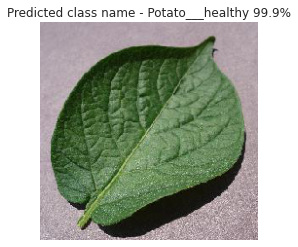

1/1 [==============================] - 0s 22ms/step
Actual class name - TomatoEarlyBlight1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Late%20blight


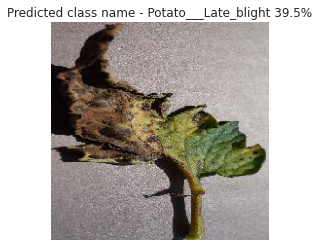

1/1 [==============================] - 0s 28ms/step
Actual class name - TomatoEarlyBlight2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Late%20blight


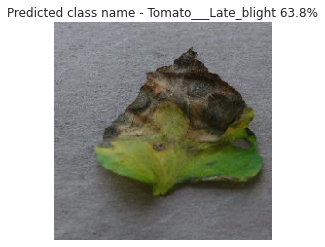

1/1 [==============================] - 0s 27ms/step
Actual class name - TomatoEarlyBlight3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Black%20rot


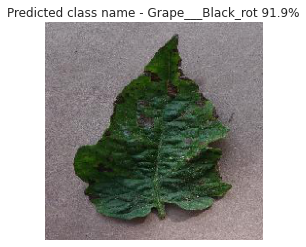

1/1 [==============================] - 0s 30ms/step
Actual class name - TomatoEarlyBlight4
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Black%20rot


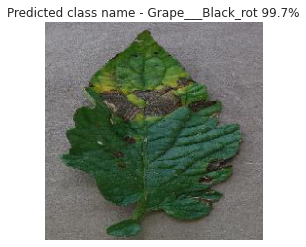

1/1 [==============================] - 0s 36ms/step
Actual class name - TomatoEarlyBlight5
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Early%20blight


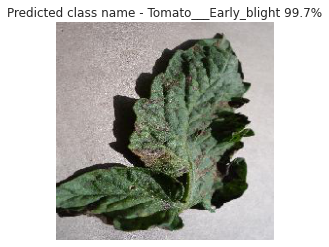

1/1 [==============================] - 0s 43ms/step
Actual class name - TomatoEarlyBlight6
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Spider%20mites Two-spotted%20spider%20mite


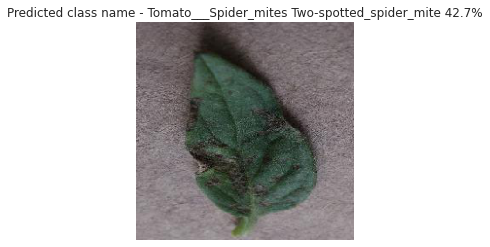

1/1 [==============================] - 0s 38ms/step
Actual class name - TomatoHealthy1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=healthy


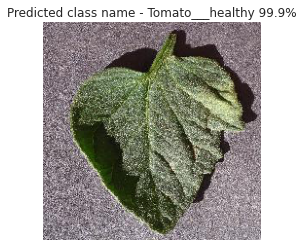

1/1 [==============================] - 0s 30ms/step
Actual class name - TomatoHealthy2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=healthy


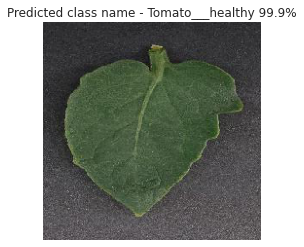

1/1 [==============================] - 0s 35ms/step
Actual class name - TomatoHealthy3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=healthy


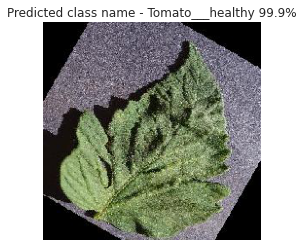

1/1 [==============================] - 0s 32ms/step
Actual class name - TomatoHealthy4
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=healthy


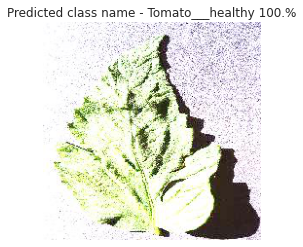

1/1 [==============================] - 0s 31ms/step
Actual class name - TomatoYellowCurlVirus1
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Tomato%20Yellow%20Leaf%20Curl%20Virus


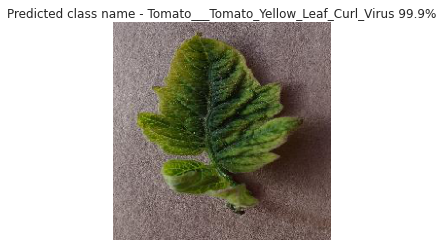

1/1 [==============================] - 0s 32ms/step
Actual class name - TomatoYellowCurlVirus2
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Tomato%20Yellow%20Leaf%20Curl%20Virus


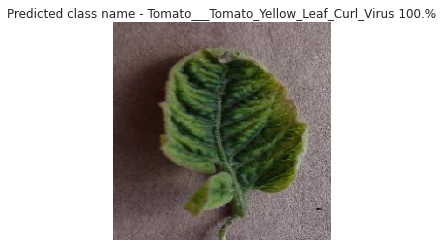

1/1 [==============================] - 0s 31ms/step
Actual class name - TomatoYellowCurlVirus3
Info URL - https://www.plantwise.org/knowledgebank/searchresults?q=Tomato%20Yellow%20Leaf%20Curl%20Virus


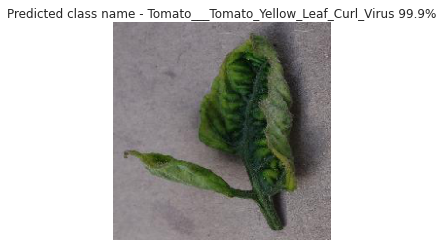

In [34]:
from tensorflow.keras.preprocessing import image
directory="/content/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,30):
    image_path = files[i]
    new_img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model_saved.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = class_list[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title("Predicted class name - " + class_name + " " + str(max_prob*100)[0:4]+"%")
    print("Actual class name - " + image_path.split('/')[-1].split('.')[0])
    print("Info URL - " + generate_url(class_name))
    plt.show()